# PARTE II: Algoritmos de aprendizaje supervisado y no supervisado aplicado a características socioeconómicas 

Empleamos el algoritmo K-Means para verificar si puede, o no, encontrar una estructura en los datos socioeconómicos de Jalisco que corresponda al nivel de dengue que hay por municipio. Posteriormente, cuando etiquetemos nuestros datos con tres categorías (muchos casos, varios casos y pocos casos), ejecutamos algoritmos de clasificación para evaluar su precisión. Finalmente, discutimos los resultados que obtuvimos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('datos/dengue0.csv')
df

,Municipio,Poblacion,Pobreza,AguaPotable,Casos,casosxmilhabs,promedio_habsxviv
0,ACATIC,21206,10.42,79.73,0,0.000000,4.017323
1,ACATLÁN DE JUÁREZ,23241,2.18,97.68,5,0.215137,4.023378
2,AHUALULCO DE MERCADO,21714,3.78,98.27,0,0.000000,3.824176
3,AMACUECA,5545,5.50,98.55,1,0.180343,3.885025
4,AMATITÁN,14648,3.23,95.39,0,0.000000,4.210496
...,...,...,...,...,...,...,...
120,ZAPOTILTIC,29192,3.87,98.71,7,0.239792,3.857105
121,ZAPOTITLÁN DE VADILLO,6685,20.00,98.10,2,0.299177,4.000000
122,ZAPOTLÁN DEL REY,17585,7.87,98.03,0,0.000000,4.026273
123,ZAPOTLÁN EL GRANDE,100534,1.45,98.75,6,0.059681,3.925136


Guardamos las características socioeconómicas en el siguiente arreglo:

In [3]:
X = np.array(df[["Pobreza","AguaPotable","promedio_habsxviv"]])

In [4]:
X.shape

(125, 3)

## Aprendizaje no supervisado: Clustering

Clustering, a diferencia del aprendizaje supervisado, es un aprendizaje basado en la observación y no en ejemplos. Los puntos dentro de un grupo o _cluster_ deben tener características muy similares, mientras que los puntos de diferentes grupos deben ser tan diferentes como sea posible. 

### K-Means
K-Means es un algoritmo de clustering cuyo objetivo es formar k grupos:
1. Asigna k centroides aleatoriamente.
2. Se asigna cada punto al centroide más cercano y se forman k grupos.
3. Se calcula la media de cada grupo de puntos y este es el nuevo centroide.    

Los pasos 2 y 3 se repiten hasta que todos los puntos del conjunto de datos estén dentro de la frontera del centroide más cercano.

Una vez obtenidos los centroides finales con el conjunto de entrenamiento se analizan sus características para generar una etiqueta única para cada grupo. Los nuevos datos se asignan al centroide más cercano de los k grupos.

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

#### Método del codo y la silueta
El algoritmo K-Means necesita como datos de entrada el número de grupos que deseamos formar, para lo cual empleamos el método del codo y la silueta.

**Metodo del codo**. Encuentra el número de centroides óptimo. A medida que el número de centroides aumenta, la suma de la distancia cuadrada de los puntos a su centroide disminuye, hasta llegar al punto donde hace un codo y este corresponde al número óptimo de grupos. 

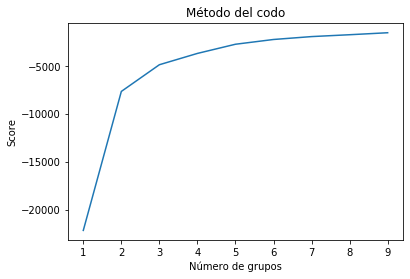

In [6]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de grupos')
plt.ylabel('Score')
plt.title('Método del codo')
plt.show()

El número de grupos óptimo podría ser, por tanto, 2 o 3. 

**Método la silueta**. El coeficiente de la silueta, $s(i)$, mide qué tan parecido es un dato a su propio grupo en comparación a los demás. Está dado por:
$$s(i)=\frac{b(i)-a(i)}{\max\{a(i),b(i)\}}$$
por tanto, 
$$s(i)\in [-1,1]$$
$a(i)$ es la distancia media de $i$ a todos los demás puntos que pertencen a su clúster.  
$b(i)$ es el mínimo de las distancias medias de $i$ a los puntos que pertencen a un clúster diferente al suyo. Se toma el mínimo, pues queremos saber qué tan cerca está el punto $i$ de otro clúster. Lo deseado sería tener un valor grande de $b(i)$ comparado con el de $a(i)$, ya que esto significaría que el punto $i$ está muy separado de los clústeres a los que no pertenece.  

Así, lo ideal sería que todos los puntos de nuestro conjunto de datos tuvieran un coeficiente de silueta cercano a 1; esto nos diría qué tan acertada fue nuestra elección del número de clústeres.  

In [7]:
from sklearn.metrics import silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.7243689809612109
For n_clusters = 3 The average silhouette_score is : 0.4779365549674839
For n_clusters = 4 The average silhouette_score is : 0.47598678929449584
For n_clusters = 5 The average silhouette_score is : 0.47713152744919546
For n_clusters = 6 The average silhouette_score is : 0.398837041786555


Text(0, 0.5, 'Media de los coeficientes de silueta')

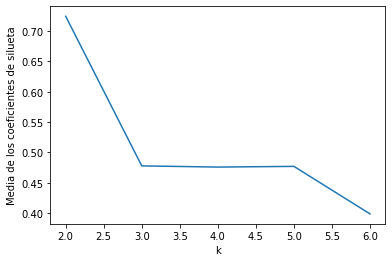

In [8]:
range_n_clusters = [2, 3, 4, 5, 6]
SILH_AVG=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    SILH_AVG.append(silhouette_avg)
plt.plot(range_n_clusters, SILH_AVG)
plt.xlabel('k')
plt.ylabel('Media de los coeficientes de silueta')

Elegimos 2 como el número de grupos óptimo.

#### Ejecutamos K-Means.

Especificamos el número de clusters y ajustamos el modelo a los datos de entrenamiento:

In [9]:
kmeans=KMeans(n_clusters=2).fit(X)

Predecimos el cluster más cercano a cada punto de X

In [10]:
labels = kmeans.predict(X)

Obtenemos las coordenadas de los centros de los clusters

In [11]:
centroides=kmeans.cluster_centers_

#### Visualización 3D
Graficamos los grupos que obtuvo K-Means

In [12]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'promedio de habitantes por vivienda')

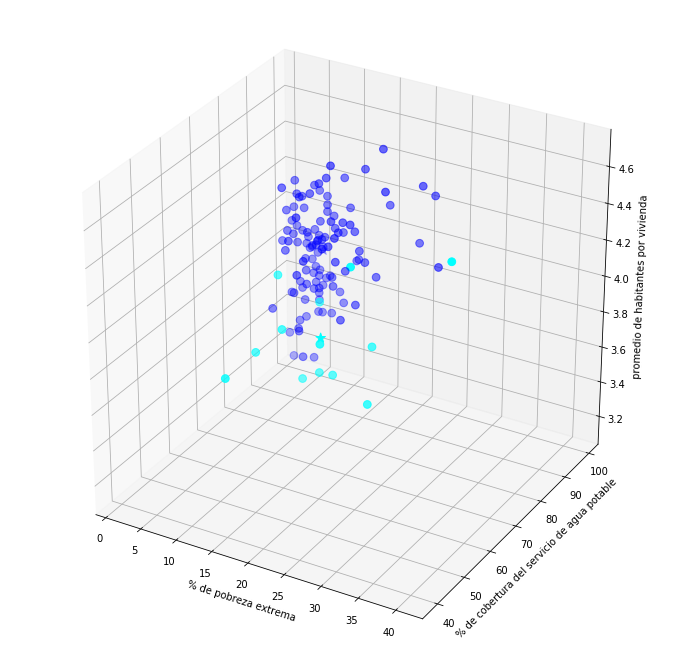

In [13]:
colores_kmeans=['blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores_kmeans[row])
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111,  projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=asignar, s=60)
ax.scatter(centroides[:,0], centroides[:,1], centroides[:,2], c=colores_kmeans, s=100, marker='*' )
ax.set_xlabel('% de pobreza extrema')
ax.set_ylabel('% de cobertura del servicio de agua potable')
ax.set_zlabel('promedio de habitantes por vivienda')

## Categorias
Etiquetamos los datos de acuerdo al nivel de dengue: muchos casos (2), varios casos (1), pocos casos (0)

In [14]:
categoria = []
for i in range((len(df['casosxmilhabs']))):
    if df['casosxmilhabs'][i]<=.1:
        categoria=np.append(categoria,0)
    elif .1<df['casosxmilhabs'][i]<=.5:
        categoria=np.append(categoria,1)
    else:
        categoria=np.append(categoria,2)

In [15]:
categoria= categoria.astype(np.int64)

In [16]:
df_categoria=pd.DataFrame(categoria,columns=['Categoria'])

In [17]:
df_categoria

,Categoria
0,0
1,1
2,0
3,1
4,0
...,...
120,1
121,1
122,0
123,0


In [18]:
df = pd.concat([df, df_categoria], axis=1, sort=False)

In [19]:
df

,Municipio,Poblacion,Pobreza,AguaPotable,Casos,casosxmilhabs,promedio_habsxviv,Categoria
0,ACATIC,21206,10.42,79.73,0,0.000000,4.017323,0
1,ACATLÁN DE JUÁREZ,23241,2.18,97.68,5,0.215137,4.023378,1
2,AHUALULCO DE MERCADO,21714,3.78,98.27,0,0.000000,3.824176,0
3,AMACUECA,5545,5.50,98.55,1,0.180343,3.885025,1
4,AMATITÁN,14648,3.23,95.39,0,0.000000,4.210496,0
...,...,...,...,...,...,...,...,...
120,ZAPOTILTIC,29192,3.87,98.71,7,0.239792,3.857105,1
121,ZAPOTITLÁN DE VADILLO,6685,20.00,98.10,2,0.299177,4.000000,1
122,ZAPOTLÁN DEL REY,17585,7.87,98.03,0,0.000000,4.026273,0
123,ZAPOTLÁN EL GRANDE,100534,1.45,98.75,6,0.059681,3.925136,0


In [21]:
# df.to_csv('datos/dengue1.csv', encoding='utf-8', index=False) # se utiliza en la parte IV

Text(0.5, 1.0, 'Categorías')

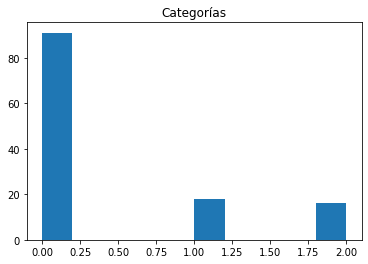

In [22]:
plt.hist(df['Categoria'])
plt.title('Categorías')

Observamos que hay un desbalance de datos: la mayoria de los datos pertenece a la categoría 0. 

#### Visualización 3D

Distribución de las categorias en el espacio de los atributos socioeconómicos. Un nivel alto, moderado y bajo de casos de dengue corresponden a los colores rojo, naranja y verde, respectivamente.

Text(0.5, 0, 'promedio de habs. por vivienda')

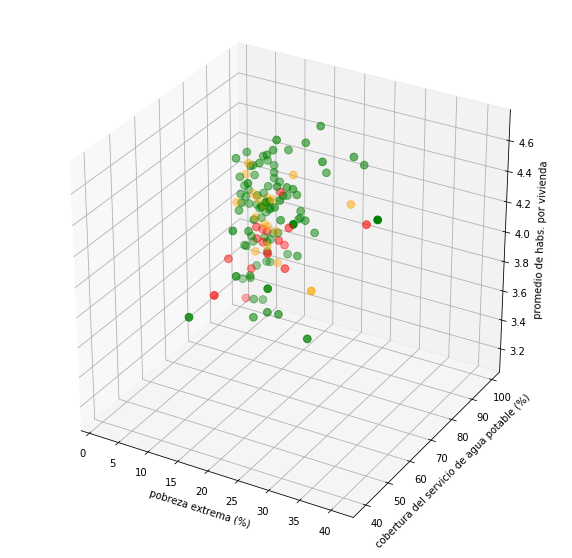

In [23]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111,  projection='3d')
colores=['green','orange','red']
asignar=[]
for row in categoria:
    asignar.append(colores[row])
ax.scatter(X[:,0], X[:,1],X[:,2], c=asignar, s=60)
ax.set_xlabel('pobreza extrema (%)')
ax.set_ylabel('cobertura del servicio de agua potable (%)')
ax.set_zlabel('promedio de habs. por vivienda')

En los dos grupos que formó K-Means veamos cuántos datos de cada hay 

In [24]:
#Veamos cuántos puntos contiene cada grupo 
copy=pd.DataFrame()
copy['Municipio']=df['Municipio'].values
copy['Categoria']=df['Categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores_kmeans
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,112
1,cyan,13


In [25]:
# Veamos la diversidad del nivel de casos (0-->leve,1-->moderado,2-->alto) que hay en cada grupo.
for i in range(2):
    group_referrer_index = copy['label'] ==i
    group_referrals = copy[group_referrer_index]
    diversidad =  pd.DataFrame()
    diversidad['categoria']=[0,1,2]
    diversidad['cantidad']=group_referrals.groupby('Categoria').size()
    print ('Diversidad del grupo %d (%s) ' % (i,colores_kmeans[i]))
    print (diversidad)

Diversidad del grupo 0 (blue) 
   categoria  cantidad
0          0        81
1          1        17
2          2        14
Diversidad del grupo 1 (cyan) 
   categoria  cantidad
0          0        10
1          1         1
2          2         2


## Aprendizaje supervisado: Clasificación

En este tipo de aprendizaje al algoritmo le debemos dar la variable objetivo $y$, que, en este caso, es la  variable `Categoria`.
Como el número de categorías es finito, se trata de una tarea de clasificación. Los algoritmos de clasificación que emplearemos son: 
* Regresión Logística
* kNN
* SVM
* Kernel SVM
* Naïve Bayes
* Árbol de decisión
* Clasificación de Random Forest

In [26]:
y=df.Categoria #variable objetivo
y

0      0
1      1
2      0
3      1
4      0
      ..
120    1
121    1
122    0
123    0
124    0
Name: Categoria, Length: 125, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split # Dividir los datos en un conjunto de entrenamiento y un conjunto de validación
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.10, random_state=1)

In [28]:
from sklearn.preprocessing import StandardScaler # Normalizar los datos
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [29]:
precision = [] #en esta lista se guardará la precisión de cada modelo

### 1. Regresión Logística

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
classifier = LogisticRegression(random_state = 0) #definir el modelo
classifier.fit(X_train, y_train) # ajustar el modelo

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred = classifier.predict(X_test) # predecir los valores

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
from sklearn.metrics import plot_confusion_matrix

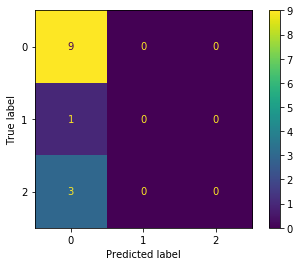

In [35]:
plot_confusion_matrix(classifier,X_test,y_test)
plt.show()

In [36]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[9, 0, 0],
       [1, 0, 0],
       [3, 0, 0]], dtype=int64)

In [37]:
true_pred=cm[0,0]+cm[1,1]+cm[2,2]
total_pred=y_test.size
accuracy=true_pred/total_pred
precision.append(accuracy)
precision

[0.6923076923076923]

### 2. K-NEAREST NEIGHBORS

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[9, 0, 0],
       [1, 0, 0],
       [3, 0, 0]], dtype=int64)

In [42]:
true_pred=cm[0,0]+cm[1,1]+cm[2,2]
total_pred=y_test.size
accuracy=true_pred/total_pred
precision.append(accuracy)
precision

[0.6923076923076923, 0.6923076923076923]

### 3. SUPORT VECTOR MACHINES

In [43]:
from sklearn.svm import SVC

In [44]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [45]:
y_pred = classifier.predict(X_test)

In [46]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[9, 0, 0],
       [1, 0, 0],
       [3, 0, 0]], dtype=int64)

In [47]:
true_pred=cm[0,0]+cm[1,1]+cm[2,2]
total_pred=y_test.size
accuracy=true_pred/total_pred
precision.append(accuracy)
precision

[0.6923076923076923, 0.6923076923076923, 0.6923076923076923]

### 4. KERNEL SVM

In [48]:
from sklearn.svm import SVC

In [49]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [50]:
y_pred=classifier.predict(X_test)

In [51]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[9, 0, 0],
       [1, 0, 0],
       [3, 0, 0]], dtype=int64)

In [52]:
true_pred=cm[0,0]+cm[1,1]+cm[2,2]
total_pred=y_test.size
accuracy=true_pred/total_pred
precision.append(accuracy)
precision

[0.6923076923076923,
 0.6923076923076923,
 0.6923076923076923,
 0.6923076923076923]

### 5. Naïve Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
y_pred=classifier.predict(X_test)

In [56]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[6, 3, 0],
       [1, 0, 0],
       [2, 1, 0]], dtype=int64)

In [57]:
true_pred=cm[0,0]+cm[1,1]+cm[2,2]
total_pred=y_test.size
accuracy=true_pred/total_pred
precision.append(accuracy)
precision

[0.6923076923076923,
 0.6923076923076923,
 0.6923076923076923,
 0.6923076923076923,
 0.46153846153846156]

### 6. Decision Tree Algorithm

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [60]:
y_predict=classifier.predict(X_test)

In [61]:
cm=confusion_matrix(y_test, y_predict)
cm

array([[8, 1, 0],
       [0, 0, 1],
       [0, 2, 1]], dtype=int64)

In [62]:
true_pred=cm[0,0]+cm[1,1]+cm[2,2]
total_pred=y_test.size
accuracy=true_pred/total_pred
precision.append(accuracy)
precision

[0.6923076923076923,
 0.6923076923076923,
 0.6923076923076923,
 0.6923076923076923,
 0.46153846153846156,
 0.6923076923076923]

### 7. Random Forest Classification

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [65]:
y_predict=classifier.predict(X_test)

In [66]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[6, 3, 0],
       [1, 0, 0],
       [2, 1, 0]], dtype=int64)

In [67]:
true_pred=cm[0,0]+cm[1,1]+cm[2,2]
total_pred=y_test.size
accuracy=true_pred/total_pred
precision.append(accuracy)
precision

[0.6923076923076923,
 0.6923076923076923,
 0.6923076923076923,
 0.6923076923076923,
 0.46153846153846156,
 0.6923076923076923,
 0.46153846153846156]

#### Tabla de precisión de los algoritmo de clasificación

In [68]:
algoritmos=['logistic reg','kNN','SVM', 'Kernel SVM','Naive bayes', 'Decision Tree', 'Random Forest']
algoritmos=np.array(algoritmos).reshape(7,1)
precision=np.array(precision).reshape(7,1)

In [69]:
tabla1=pd.DataFrame({'Algoritmo': algoritmos[:, 0], 'Precisión': precision[:, 0]})
tabla1

,Algoritmo,Precisión
0,logistic reg,0.692308
1,kNN,0.692308
2,SVM,0.692308
3,Kernel SVM,0.692308
4,Naive bayes,0.461538
5,Decision Tree,0.692308
6,Random Forest,0.461538


## Discusión de resultados

Vemos que K-Means no pudo generar tres grupos que correspondieran al número de casos que hay en un municipio, que pudieran ser muchos casos, varios casos o pocos casos. Esto lo podemos apreciar porque la forma en que K-Means pintó el espacio de los atributos socioeconómicos fue diferente a la gráfica 3D de las categorías. 

La precisión de los algortimos de aprendizaje supervisado no fue demasiado baja pero tampoco fue alta. Esperamos que aumentando el número de características, considerando parametros físicos como la temperatura y la precipitación, estos resultados mejoren. 

Cabe mencionar que el hecho de que la precisión de cada uno de los algoritmos no haya sido tan mala puede ser producto del desbalance de nuestros datos, pues la mayoría de los datos pertenecen a una categoria (muy pocos casos), por lo que podría ser más por probabilidad que el algoritmo predice que un dato pertenece a la categoria 0. Esto lo podremos solucionar más adelante al considerar los datos de otros estados de México o de otras partes del mundo. 